In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [4]:
#usei o datasus_suicidio_2014_2018.csv do site kaggle
#https://www.kaggle.com/psicodata/dados-de-suicdio-no-brasil-2014-a-2018
from google.colab import files
files.upload()

Saving datasus_suicidio_2014_2018.csv to datasus_suicidio_2014_2018.csv


{'datasus_suicidio_2014_2018.csv': b'estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes\r\nAC,2014,Suic\xeddio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domic\xedlio,N\xe3o,X700,X700,37,1\r\nAC,2014,Suic\xeddio,23-01-14,30-07-66,Masculino,Branca,Uni\xe3o consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domic\xedlio,N\xe3o,X800,X800,48,1\r\nAC,2014,Suic\xeddio,31-01-14,28-07-43,Masculino,Branca,NA,NA,0,Rio Branco,Domic\xedlio,N\xe3o,X700,X700,71,1\r\nAC,2014,Suic\xeddio,05-02-14,04-07-99,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciol\xe2ndia,Outros,N\xe3o,X700,X700,15,2\r\nAC,2014,Suic\xeddio,06-02-14,02-05-72,Masculino,Branca,NA,NA,0,Rio Branco,Outros,N\xe3o,X700,X700,42,2\r\nAC,2014,Suic\xeddio,21-02-14,10-06-63,Masculino,Parda,Solteiro,8 a 11 anos,0,Rio Branco,Domic\xedlio,N\xe3o,X700,X700,51,2\r\nAC,2014,Suic\xeddio,27-02-14,06-08-89,Ma

In [5]:
df = pd.read_csv("datasus_suicidio_2014_2018.csv",sep = ",",error_bad_lines="false",encoding='latin-1')

In [6]:
df.head()

estado   ano CIRCOBITO   DTOBITO  ... CAUSABAS CAUSABAS_O idade mes
0     AC  2014  Suicídio  02-01-14  ...     X700       X700  37.0   1
1     AC  2014  Suicídio  23-01-14  ...     X800       X800  48.0   1
2     AC  2014  Suicídio  31-01-14  ...     X700       X700  71.0   1
3     AC  2014  Suicídio  05-02-14  ...     X700       X700  15.0   2
4     AC  2014  Suicídio  06-02-14  ...     X700       X700  42.0   2

[5 rows x 17 columns]

In [7]:
df.loc[df["OCUP"] == "0","OCUP"] = "Nao Informado"

In [8]:
df1 = df[["estado","ano","SEXO","RACACOR","ESTCIV","OCUP","idade"]]

In [9]:
df1.head()

estado   ano  ...                             OCUP idade
0     AC  2014  ...   ATLETA PROFISSIONAL DE FUTEBOL  37.0
1     AC  2014  ...  MEDICO GINECOLOGISTA E OBSTETRA  48.0
2     AC  2014  ...                    Nao Informado  71.0
3     AC  2014  ...                        ESTUDANTE  15.0
4     AC  2014  ...                    Nao Informado  42.0

[5 rows x 7 columns]

In [10]:
df1["ESTCIV"].fillna("Nao Informado", inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [11]:
df1.head()

estado   ano  ...                             OCUP idade
0     AC  2014  ...   ATLETA PROFISSIONAL DE FUTEBOL  37.0
1     AC  2014  ...  MEDICO GINECOLOGISTA E OBSTETRA  48.0
2     AC  2014  ...                    Nao Informado  71.0
3     AC  2014  ...                        ESTUDANTE  15.0
4     AC  2014  ...                    Nao Informado  42.0

[5 rows x 7 columns]

In [12]:
df1.dtypes

estado      object
ano          int64
SEXO        object
RACACOR     object
ESTCIV      object
OCUP        object
idade      float64
dtype: object

In [13]:
df1.describe()

ano         idade
count  58634.000000  58407.000000
mean    2016.093325     42.543308
std        1.412665     17.378526
min     2014.000000      0.000000
25%     2015.000000     29.000000
50%     2016.000000     40.000000
75%     2017.000000     54.000000
max     2018.000000    113.000000

In [14]:
df1.groupby("ano")["ano"].count()

ano
2014    10683
2015    11211
2016    11455
2017    12521
2018    12764
Name: ano, dtype: int64

In [15]:
df1.groupby(["RACACOR","SEXO"])["RACACOR"].count()

RACACOR   SEXO     
Amarela   Feminino        60
          Masculino      183
Branca    Feminino      6796
          Masculino    22397
Indígena  Feminino       172
          Masculino      485
Parda     Feminino      4589
          Masculino    19561
Preta     Feminino       545
          Masculino     2505
Name: RACACOR, dtype: int64

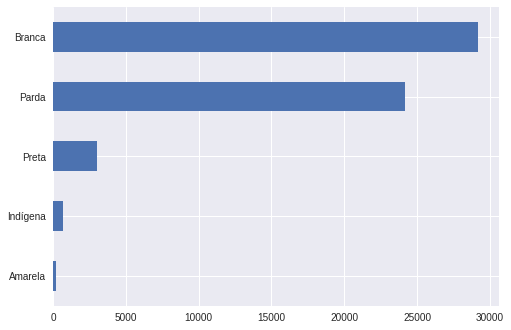

In [16]:
df["RACACOR"].value_counts(ascending=True).plot.barh();

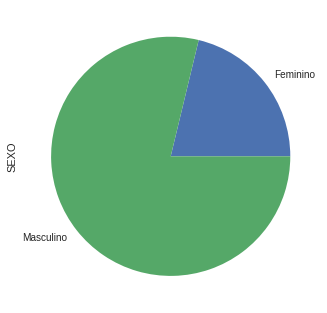

In [17]:
df["SEXO"].value_counts(ascending=True).plot.pie();

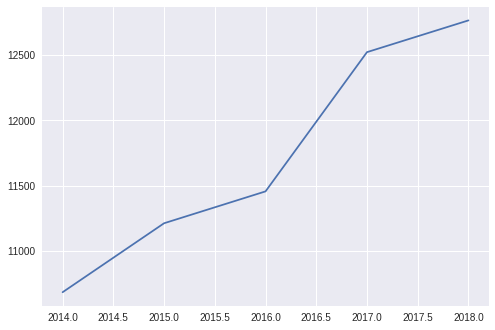

In [18]:
df["ano"].value_counts(ascending=True).plot();